# Mapping Cell Names to the Cell Ontology/Taxonomy

Cell Ontology (CL) (https://obofoundry.org/ontology/cl.html) is an ontology designed to classify and describe cell types across different organisms. It serves as a resource for model organism and bioinformatics databases. The ontology covers a broad range of cell types in animal cells, with over 2700 cell type classes, and provides high-level cell type classes as mapping points for cell type classes in ontologies representing other species, such as the Plant Ontology or Drosophila Anatomy Ontology. Integration with other ontologies such as Uberon, GO, CHEBI, PR, and PATO enables linking cell types to anatomical structures, biological processes, and other relevant concepts.

Cell Taxonomy (https://ngdc.cncb.ac.cn/celltaxonomy), a comprehensive and curated repository of cell types and associated cell markers encompassing a wide range of species, tissues and conditions. Combined with literature curation and data integration, the current version of Cell Taxonomy establishes a well-structured taxonomy for 3,143 cell types and houses a comprehensive collection of 26,613 associated cell markers in 257 conditions and 387 tissues across 34 species. Based on 4,299 publications and single-cell transcriptomic profiles of ∼3.5 million cells, Cell Taxonomy features multifaceted characterization for cell types and cell markers, involving quality assessment of cell markers and cell clusters, cross-species comparison, cell composition of tissues and cellular similarity based on markers.

Here we provide several functions that convert the cell names you annotated to their corresponding Cell Ontology/Taxonomy names and IDs.

All analysis are performed with `omicverse.single.CellOntologyMapper` class.

- Cell Ontology: Mungall, C., Haendel, M., Dahdul, W., Ibrahim, N., Segerdell, E., Blackburn, D., Comte, A., Niknejad, A., and Decechi, A. (2016), Uberon Ontology, http://purl.obolibrary.org/obo/uberon/releases/2016-01-26/uberon.owl
- Cell Taxonomy: Jiang, S., Qian, Q., Zhu, T., Zong, W., Shang, Y., Jin, T., ... & Zhang, Z. (2023). Cell Taxonomy: a curated repository of cell types with multifaceted characterization. Nucleic Acids Research, 51(D1), D853-D860.

<div class="admonition warning">
  <p class="admonition-title">Note</p>
  <p>
    Support for Cell Taxonomy is available in version 1.7.2rc1. You can install it with 
      
      pip install git+https://github.com/Starlitnightly/omicverse.git
      
    or 
    
      pip install omicverse==1.7.2rc1.
      
  </p>
</div>

In [1]:
import scanpy as sc
#import pertpy as pt
import omicverse as ov
ov.plot_set()

%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA H100 80GB HBM3
    • Total memory: 79.1 GB
    • Compute capability: 9.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.2rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



## Prepared datasets

Before you convert you cell names, you need to annotate at first. Here, we used haber_2017_regions dataset from `pertpy` to test.

In [2]:
import pertpy as pt
adata = pt.dt.haber_2017_regions()
adata

AnnData object with n_obs × n_vars = 9842 × 15215
    obs: 'batch', 'barcode', 'condition', 'cell_label'
    uns: 'status'

In [3]:
adata.obs['cell_label'].unique()

['Enterocyte.Progenitor', 'Stem', 'TA.Early', 'TA', 'Tuft', 'Enterocyte', 'Goblet', 'Endocrine']
Categories (8, object): ['Endocrine', 'Enterocyte', 'Enterocyte.Progenitor', 'Goblet', 'Stem', 'TA', 'TA.Early', 'Tuft']

## Download the CL Model

Before we start our analysis, we need to download the `cl.json` from Cell Ontology.

```shell
# Download cl.ono fro OBO page.
!mkdir new_ontology
!wget http://purl.obolibrary.org/obo/cl/cl.json -O new_ontology/cl.json
```

But we have also provided a function named `omicverse.single.download_cl()` to download it automatically. The benefit of this function is that it can choose an appropriate source to download the file even if you encounter a network error.

There are some alternative links to download the file manual. :

- Google Drive: https://drive.google.com/uc?export=download&id=1niokr5INjWFVjiXHfdCoWioh0ZEYCPkv
- Lanzou(蓝奏云): https://www.lanzoup.com/iN6CX2ybh48h

In [3]:
ov.single.download_cl(output_dir="new_ontology", filename="cl.json")


[1/3] Trying Official OBO Library...
    URL: http://purl.obolibrary.org/obo/cl/cl.json
    Description: Direct download from official Cell Ontology
    → Downloading...


    → Downloaded: 32.32 MB
    ✓ File validation successful
    ✓ Successfully downloaded from Official OBO Library
    File saved to: new_ontology/cl.json
    File size: 32.32 MB


(True, 'new_ontology/cl.json')

## Prepare the CellOntologyMapper

Because the CellOntologyMapper rely on the NLP embedding model of SentenceTransformer. So we need to choose a NLP embedding from huggingface. Here are some recommendation. 

You can found the entire list from [huggingface](https://huggingface.co/models?library=sentence-transformers) or [huggingface mirror](https://hf-mirror.com/models?library=sentence-transformers).

- BAAI/bge-base-en-v1.5
- BAAI/bge-small-en-v1.5
- sentence-transformers/all-MiniLM-L6-v2
- ...

In [4]:
# 
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    local_model_dir="./my_models"
)

🔨 Creating ontology resources from OBO file...
📖 Parsing ontology file...
🧠 Creating NLP embeddings...
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🔄 Encoding 16841 ontology labels...


Batches:   0%|          | 0/527 [00:00<?, ?it/s]

💾 Embeddings saved to: new_ontology/ontology_embeddings.pkl
📋 Ontology mappings included: 16841 cell types
✓ Ontology resources creation completed!


If you have calculated the embedding of cell ontology, you can load it directly.

In [50]:
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    embeddings_path='new_ontology/ontology_embeddings.pkl',
    local_model_dir="./my_models"
)

📥 Loading existing ontology embeddings...
📥 Loaded embeddings for 16841 ontology labels
📋 Ontology mappings loaded: 16841 cell types


## Mapping Celltype

We can use `map_adata` to calculate simility between the cell name in our datasets and cell name in cell ontology.

In [37]:
mapping_results = mapper.map_adata(
    adata, 
    cell_name_col='cell_label'
)

📊 Using 8 unique cell names from column 'cell_label'
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🎯 Mapping 8 cell names...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📝 Applying mapping results to AnnData...
✓ Mapping completed: 7/8 cell names have high confidence mapping


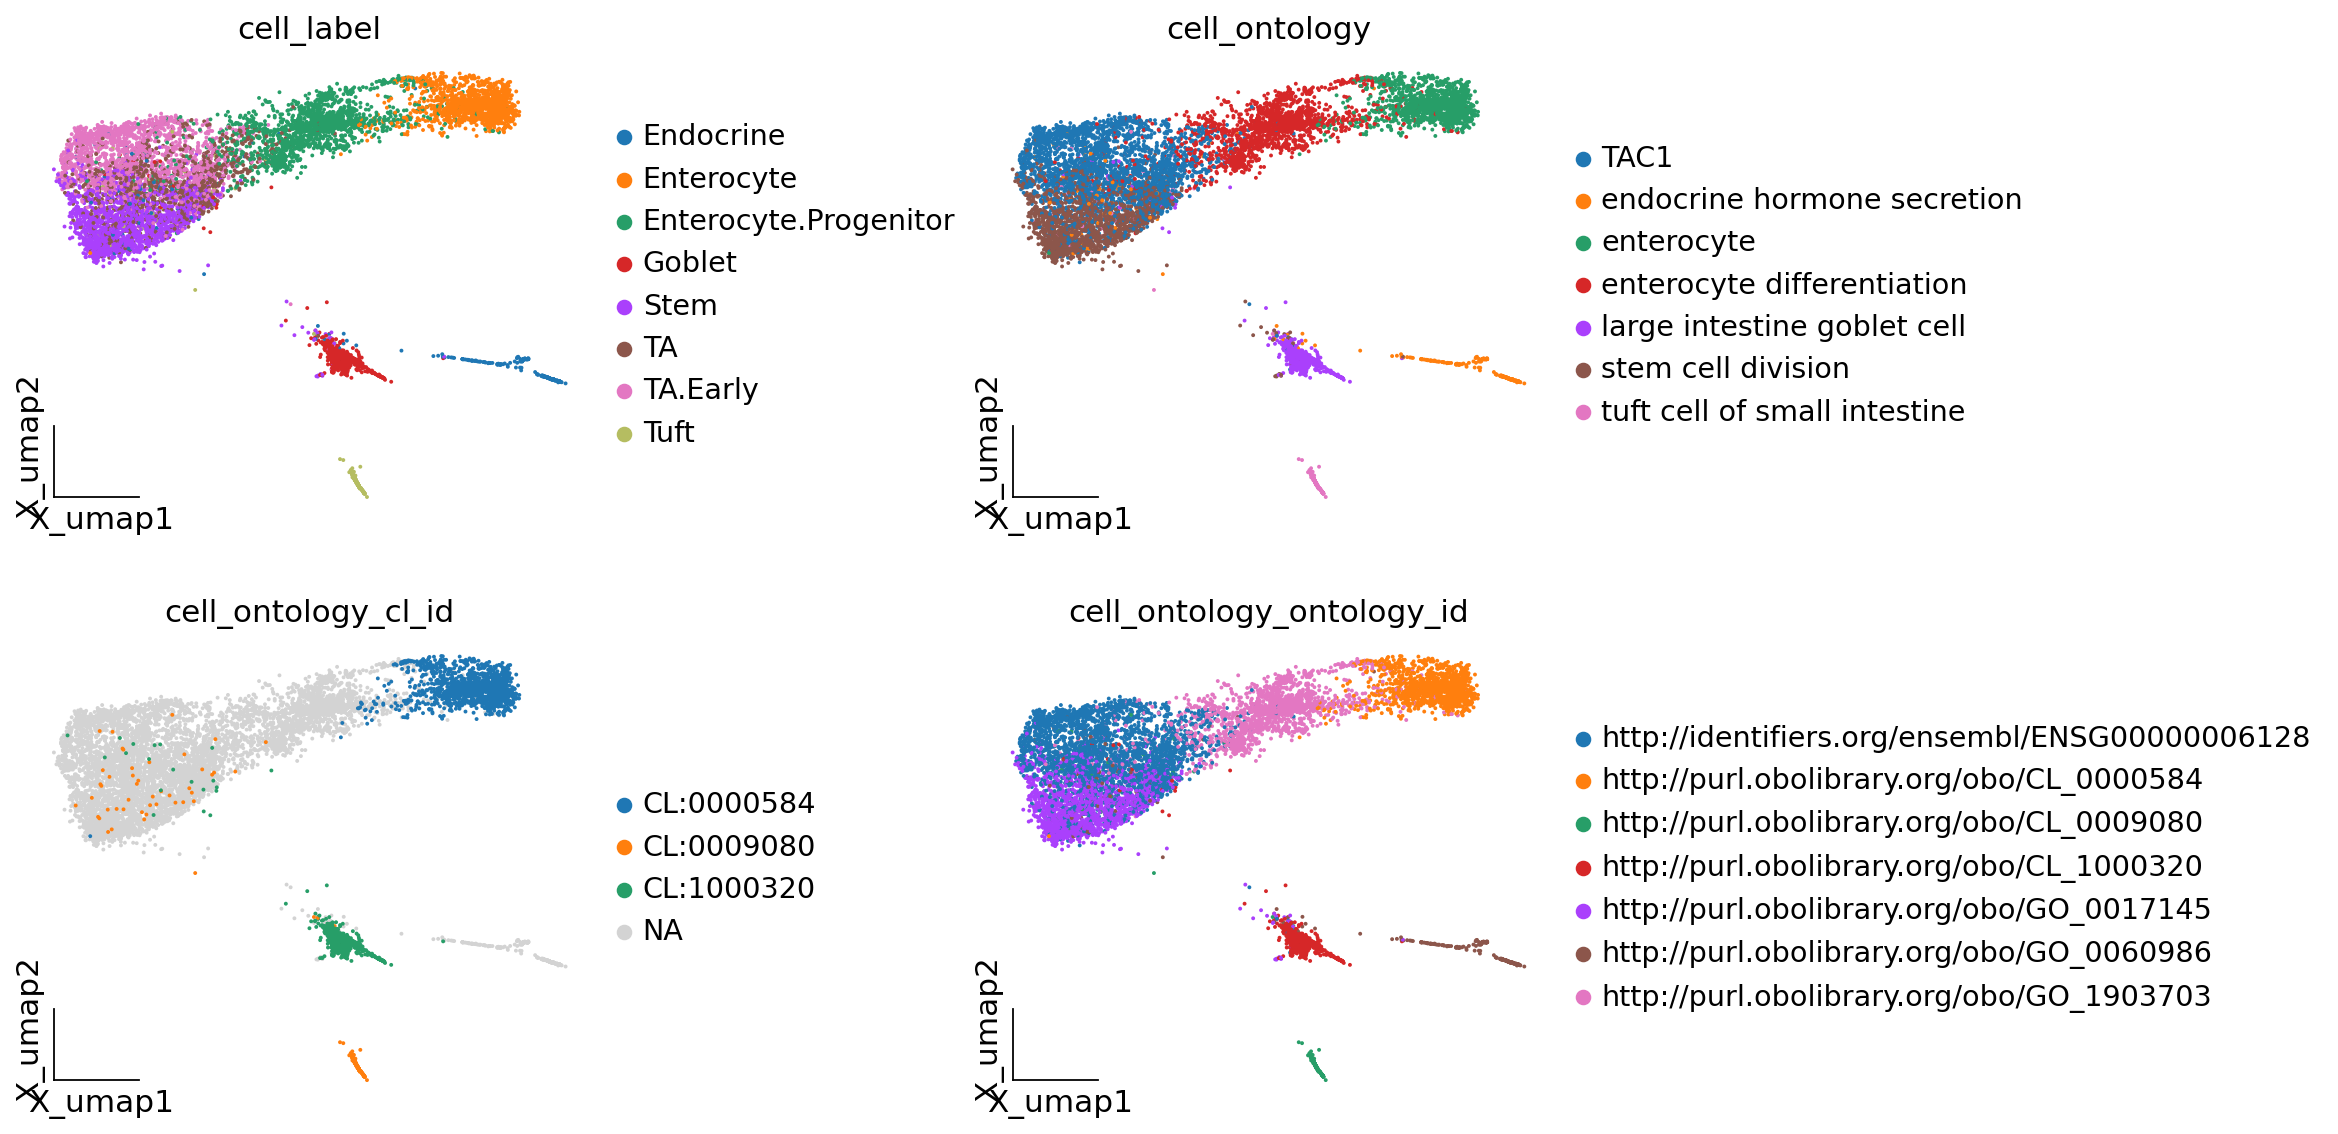

In [16]:
#ov.pl.embedding(
#    adata,
#    basis='X_umap',
#    color=['cell_label','cell_ontology','cell_ontology_cl_id','cell_ontology_ontology_id'],
#    wspace=0.55,
#    ncols=2
#)

In [17]:
mapper.print_mapping_summary(mapping_results, top_n=15)


MAPPING STATISTICS SUMMARY
Total mappings:		8
High confidence:	7 (87.50%)
Low confidence:		1
Average similarity:	0.603
Median similarity:	0.601

TOP 15 MAPPING RESULTS
------------------------------------------------------------
✓ Enterocyte -> enterocyte (Similarity: 0.776)
✓ Enterocyte.Progenitor -> enterocyte differentiation (Similarity: 0.688)
✓ Endocrine -> endocrine hormone secretion (Similarity: 0.643)
✓ TA -> TAC1 (Similarity: 0.622)
✓ Goblet -> large intestine goblet cell (Similarity: 0.581)
✓ Tuft -> tuft cell of small intestine (Similarity: 0.534)
✓ Stem -> stem cell division (Similarity: 0.519)
? TA.Early -> TAC1 (Similarity: 0.460)


## Mapping Cell Types with LLM Assistance

In addition, we often use abbreviations to name our cell types, such as `TA` and `TA.Early` in our data sets. Calculating similarity to the Cell Ontology directly can be confusing, so we use an LLM to expand these abbreviated cell names.

To do so, specify the following arguments:

* **api\_type**: `openai`, `anthropic`, `ollama`, or any other API that follows the OpenAI format
* **tissue\_context**: the tissue source of the single-cell data set
* **species**: the species from which the data set was derived
* **study\_context**: any additional information that may help the model expand the cell-type name
* **api_key**: the apikey of your model. 



In [51]:
mapper.setup_llm_expansion(
    api_type="openai", model='gpt-4o-2024-11-20',
    tissue_context="gut",    # 组织上下文
    species="mouse",                   # 物种信息
    study_context="Epithelial cells from the small intestine and organoids of mice. Some of the cells were also subject to Salmonella or Heligmosomoides polygyrus infection",
    api_key="sk-*"
)


✓ Loaded 25 cached abbreviation expansions
✓ LLM expansion functionality setup complete (Type: openai, Model: gpt-4o-2024-11-20)
🧬 Tissue context: gut
🔬 Study context: Epithelial cells from the small intestine and organoids of mice. Some of the cells were also subject to Salmonella or Heligmosomoides polygyrus infection
🐭 Species: mouse


True

You can choose any other model api from the alternative provider, such as `ohmygpt`. But the format of openai should observe the rule of openai.

In [12]:
mapper.setup_llm_expansion(
    api_type="custom_openai",
    api_key="sk-*",
    model="gpt-4.1-2025-04-14",
    base_url="https://api.ohmygpt.com/v1"
)

✓ Loaded 20 cached abbreviation expansions
✓ LLM expansion functionality setup complete (Type: custom_openai, Model: gpt-4.1-2025-04-14)
🌐 Custom Base URL: https://api.ohmygpt.com/v1
🐭 Species: human


True

In [39]:
mapping_results = mapper.map_adata_with_expansion(
    adata=adata,
    cell_name_col='cell_label',
    threshold=0.5,
    expand_abbreviations=True  # 启用缩写扩展
)
mapper.print_mapping_summary(mapping_results, top_n=15)

📊 Using 8 unique cell names from column 'cell_label'
🔍 Debug: expand_abbreviations=True
🔍 Debug: self.llm_client is not None = True
🔍 Debug: condition result = True
📝 Step 1: Expanding abbreviations
🔍 Analyzing cell names...
🧬 Using tissue context: gut
🔬 Using study context: Epithelial cells from the small intestine and organoids of mice. Some of the cells were also subject to Salmonella or Heligmosomoides polygyrus infection
🐭 Species: mouse
✓ No abbreviations found to expand

🎯 Step 2: Performing ontology mapping
🎯 Mapping 8 cell names...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


📝 Applying mapping results to AnnData...
✓ Mapping completed:
  📊 8/8 cell names have high confidence mapping
  🔄 5/8 cell names underwent abbreviation expansion

MAPPING STATISTICS SUMMARY
Total mappings:		8
High confidence:	8 (100.00%)
Low confidence:		0
Average similarity:	0.724
Median similarity:	0.735

TOP 15 MAPPING RESULTS
------------------------------------------------------------
✓ Tuft -> tuft cell (Similarity: 0.787)
✓ Enterocyte -> enterocyte (Similarity: 0.776)
✓ TA -> transit amplifying cell of appendix (Similarity: 0.741)
✓ Stem -> intestinal crypt stem cell (Similarity: 0.735)
✓ Goblet -> small intestine goblet cell (Similarity: 0.734)
✓ Enterocyte.Progenitor -> enterocyte differentiation (Similarity: 0.688)
✓ TA.Early -> transit amplifying cell (Similarity: 0.688)
✓ Endocrine -> endocrine hormone secretion (Similarity: 0.643)


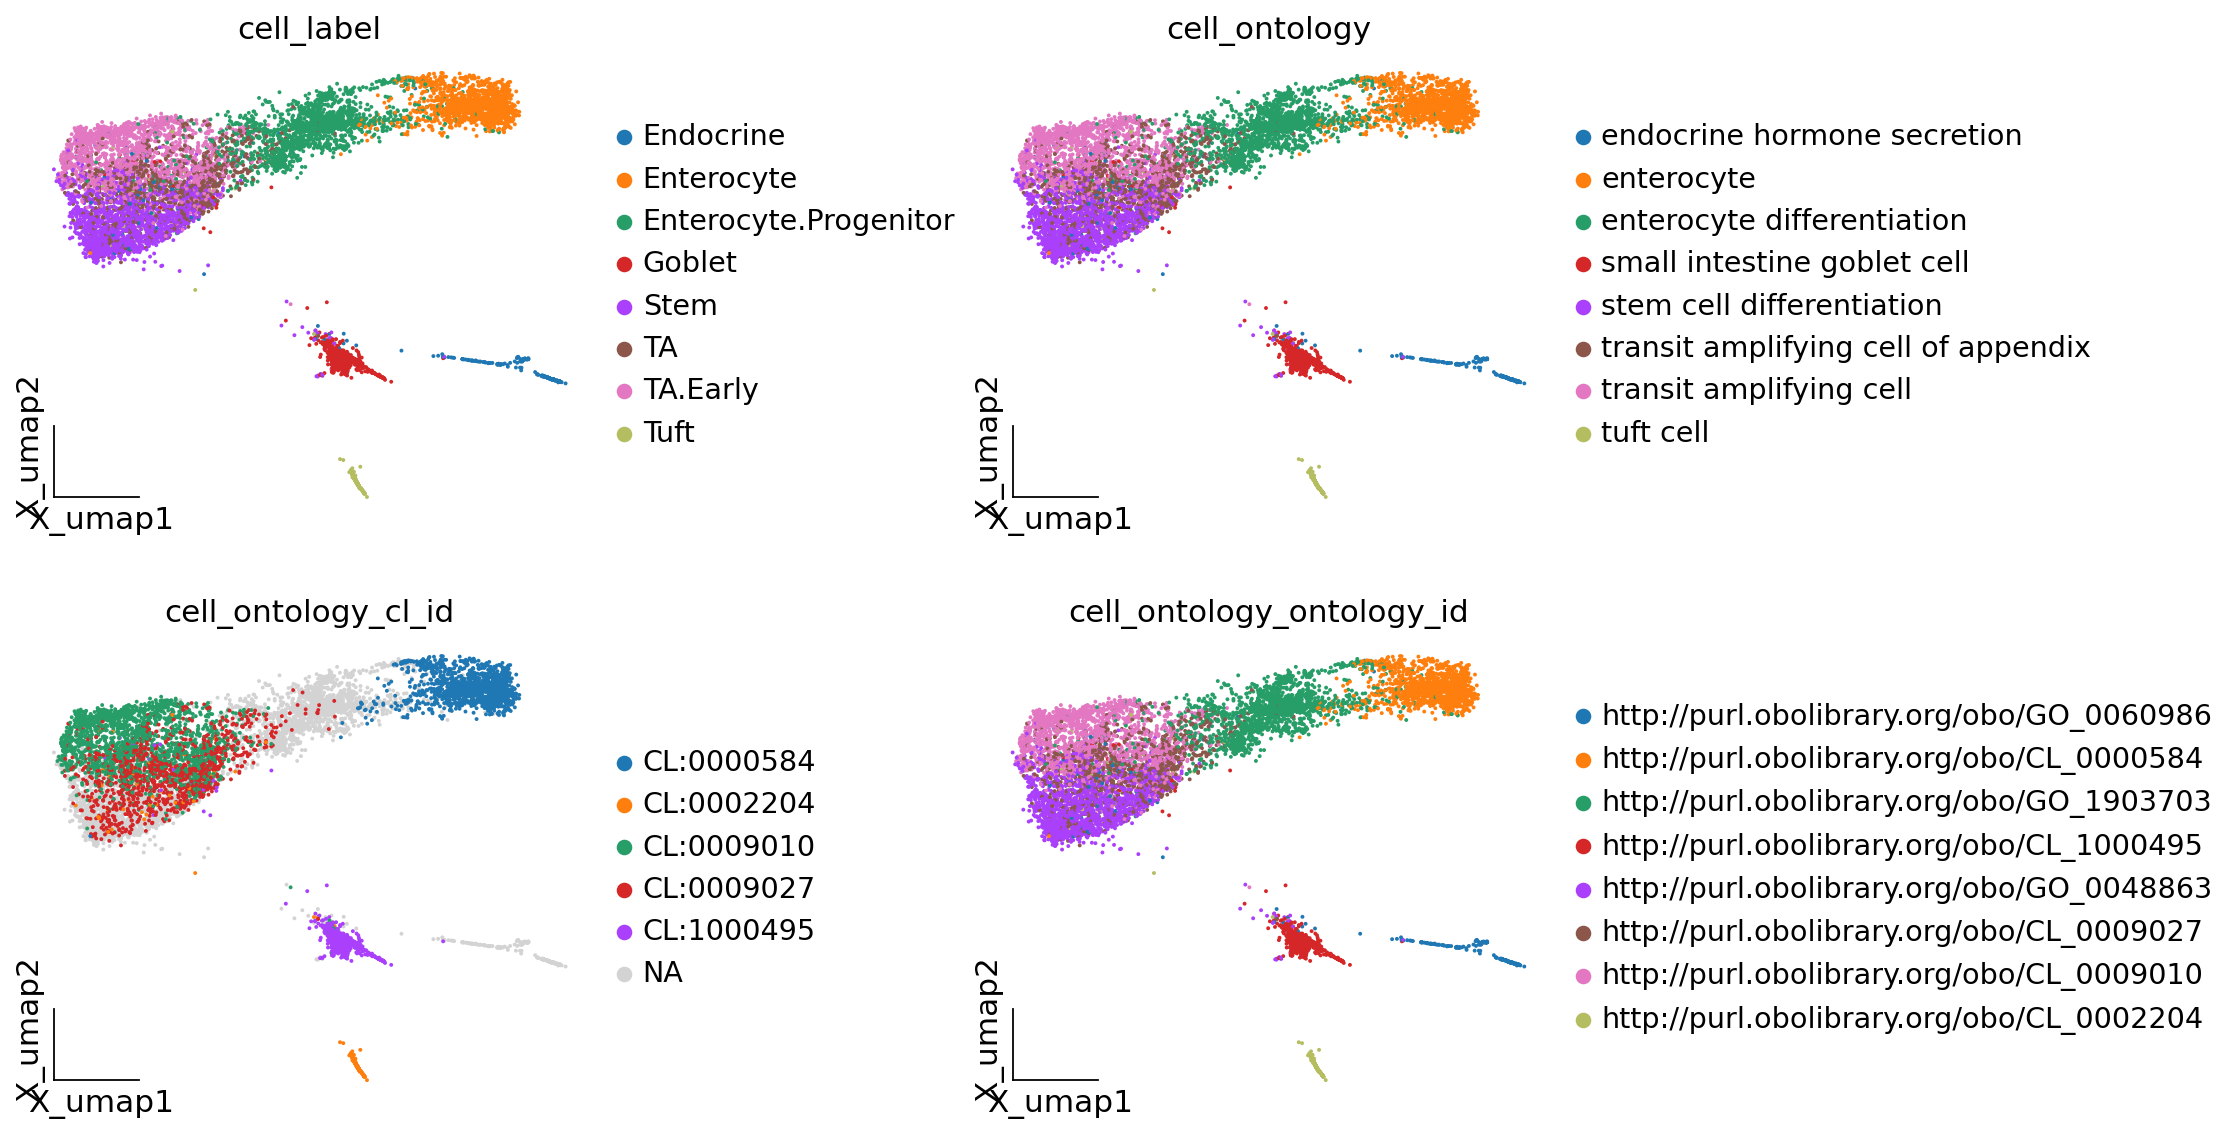

In [27]:
#ov.pl.embedding(
#    adata,
#    basis='X_umap',
#    color=['cell_label','cell_ontology','cell_ontology_cl_id','cell_ontology_ontology_id'],
#    wspace=0.55,
#    ncols=2
#)

We can now see that `TA` and `TA.Early` map successfully to `transit amplifying cell`.

## Cell Taxonomy

To enhance the annotation of cell type, we can choose not only from Cell Ontology, we can also use `Cell Taxonomy` database as another reference.

In [4]:
!wget https://download.cncb.ac.cn/celltaxonomy/Cell_Taxonomy_resource.txt -O new_ontology/Cell_Taxonomy_resource.txt

--2025-06-08 01:57:53--  https://download.cncb.ac.cn/celltaxonomy/Cell_Taxonomy_resource.txt
Resolving download.cncb.ac.cn (download.cncb.ac.cn)... 124.16.164.229
Connecting to download.cncb.ac.cn (download.cncb.ac.cn)|124.16.164.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117817373 (112M) [text/plain]
Saving to: ‘new_ontology/Cell_Taxonomy_resource1.txt’

 0% [                                       ] 237,311     57.8KB/s  eta 33m 4s ^C


In [52]:
mapper.load_cell_taxonomy_resource("new_ontology/Cell_Taxonomy_resource.txt", 
                                   species_filter=["Homo sapiens", "Mus musculus"])


📊 Loading Cell Taxonomy resource from: new_ontology/Cell_Taxonomy_resource.txt
✓ Loaded 226222 taxonomy entries
🐭 Filtered by species ['Homo sapiens', 'Mus musculus']: 224736/226222 entries
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🧠 Creating embeddings for 2540 taxonomy cell types...


Batches:   0%|          | 0/80 [00:00<?, ?it/s]

✓ Created taxonomy embeddings for 2540 cell types
📈 Species distribution:
  🐭 Mus musculus: 141727 entries
  🐭 Homo sapiens: 83009 entries
🧬 Unique cell types: 2540
🎯 Unique markers: 25818


True

Similiarly, we can use `map_adata_with_taxonomy` to perform the mapping.

In [53]:
enhanced_results = mapper.map_adata_with_taxonomy(
    adata, 
    cell_name_col="cell_label",
    new_col_name="enhanced_cell_ontology",
    expand_abbreviations=True,
    use_taxonomy=True,
    species="Mus musculus",
    tissue_context="Gut",
    threshold=0.3,
)

📊 Using 8 unique cell names from column 'cell_label'
📝 Step 1: Expanding abbreviations
🔍 Analyzing cell names...
🧬 Using tissue context: Gut
🔬 Using study context: Epithelial cells from the small intestine and organoids of mice. Some of the cells were also subject to Salmonella or Heligmosomoides polygyrus infection
🐭 Species: Mus musculus
✓ No abbreviations found to expand

🎯 Step 2: Performing ontology mapping
🎯 Mapping 8 cell names...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


📊 Enhancing with taxonomy resource using NLP similarity...
🧬 Taxonomy enhancement: Processing 8 cell names...
    ✓ Taxonomy match: 'Enterocyte.Progenitor' → 'Enterocyte progenitor cell' (Homo sapiens) (sim: 0.898)
  🔤 Using expanded name 'Intestinal stem cell' (from 'Stem') for taxonomy matching
    ✓ Taxonomy match: 'Intestinal stem cell' → 'Intestinal stem cell' (Mus musculus) (sim: 1.000) [USED EXPANDED NAME]
  🔤 Using expanded name 'Transit Amplifying Early Cell' (from 'TA.Early') for taxonomy matching
    ✓ Taxonomy match: 'Transit Amplifying Early Cell' → 'Transit amplifying cell' (Mus musculus) (sim: 0.894) [USED EXPANDED NAME]
  🔤 Using expanded name 'Transit amplifying cell' (from 'TA') for taxonomy matching
    ✓ Taxonomy match: 'Transit amplifying cell' → 'Transit amplifying cell' (Mus musculus) (sim: 1.000) [USED EXPANDED NAME]
  🔤 Using expanded name 'Tuft cell' (from 'Tuft') for taxonomy matching
    ✓ Taxonomy match: 'Tuft cell' → 'Intestinal tuft cell' (Mus musculus) 

In [54]:
mapper.print_mapping_summary_taxonomy(enhanced_results)


ENHANCED MAPPING SUMMARY (ONTOLOGY + TAXONOMY)
Total mappings:		8
High confidence:	8 (100.00%)
Low confidence:		0
Average similarity:	0.724
LLM expansions:		5
Taxonomy enhanced:	8

DETAILED MAPPING RESULTS (Top 10)
--------------------------------------------------------------------------------

 1. [✓] Tuft
     🔤 Expanded: Tuft → Tuft cell
     🎯 Ontology: tuft cell
        Similarity: 0.787
        CL ID: CL:0002204
     🧬 Taxonomy: Intestinal tuft cell
        Similarity: 0.814
        Matched from: Tuft cell
        CT ID: CT:00002708
        🎯 Marker: Dclk1
        🧬 Gene: 1700113D08Rik,2810480F11Rik,AI836758,CPG1,Clic,Click-I,Cpg16,Dc,Dcamk,Dcamkl1,Dcl,Dclk,mKIAA0369,DCLK1
        🆔 ENTREZ: 13175


 2. [✓] Enterocyte
     🎯 Ontology: enterocyte
        Similarity: 0.776
        CL ID: CL:0000584
     🧬 Taxonomy: Enterocyte
        Similarity: 1.000
        Matched from: Enterocyte
        CT ID: CT:00000594
        🎯 Marker: Btnl1
        🧬 Gene: Btn,Btnl3,Gm316,Gm33,NG1
      

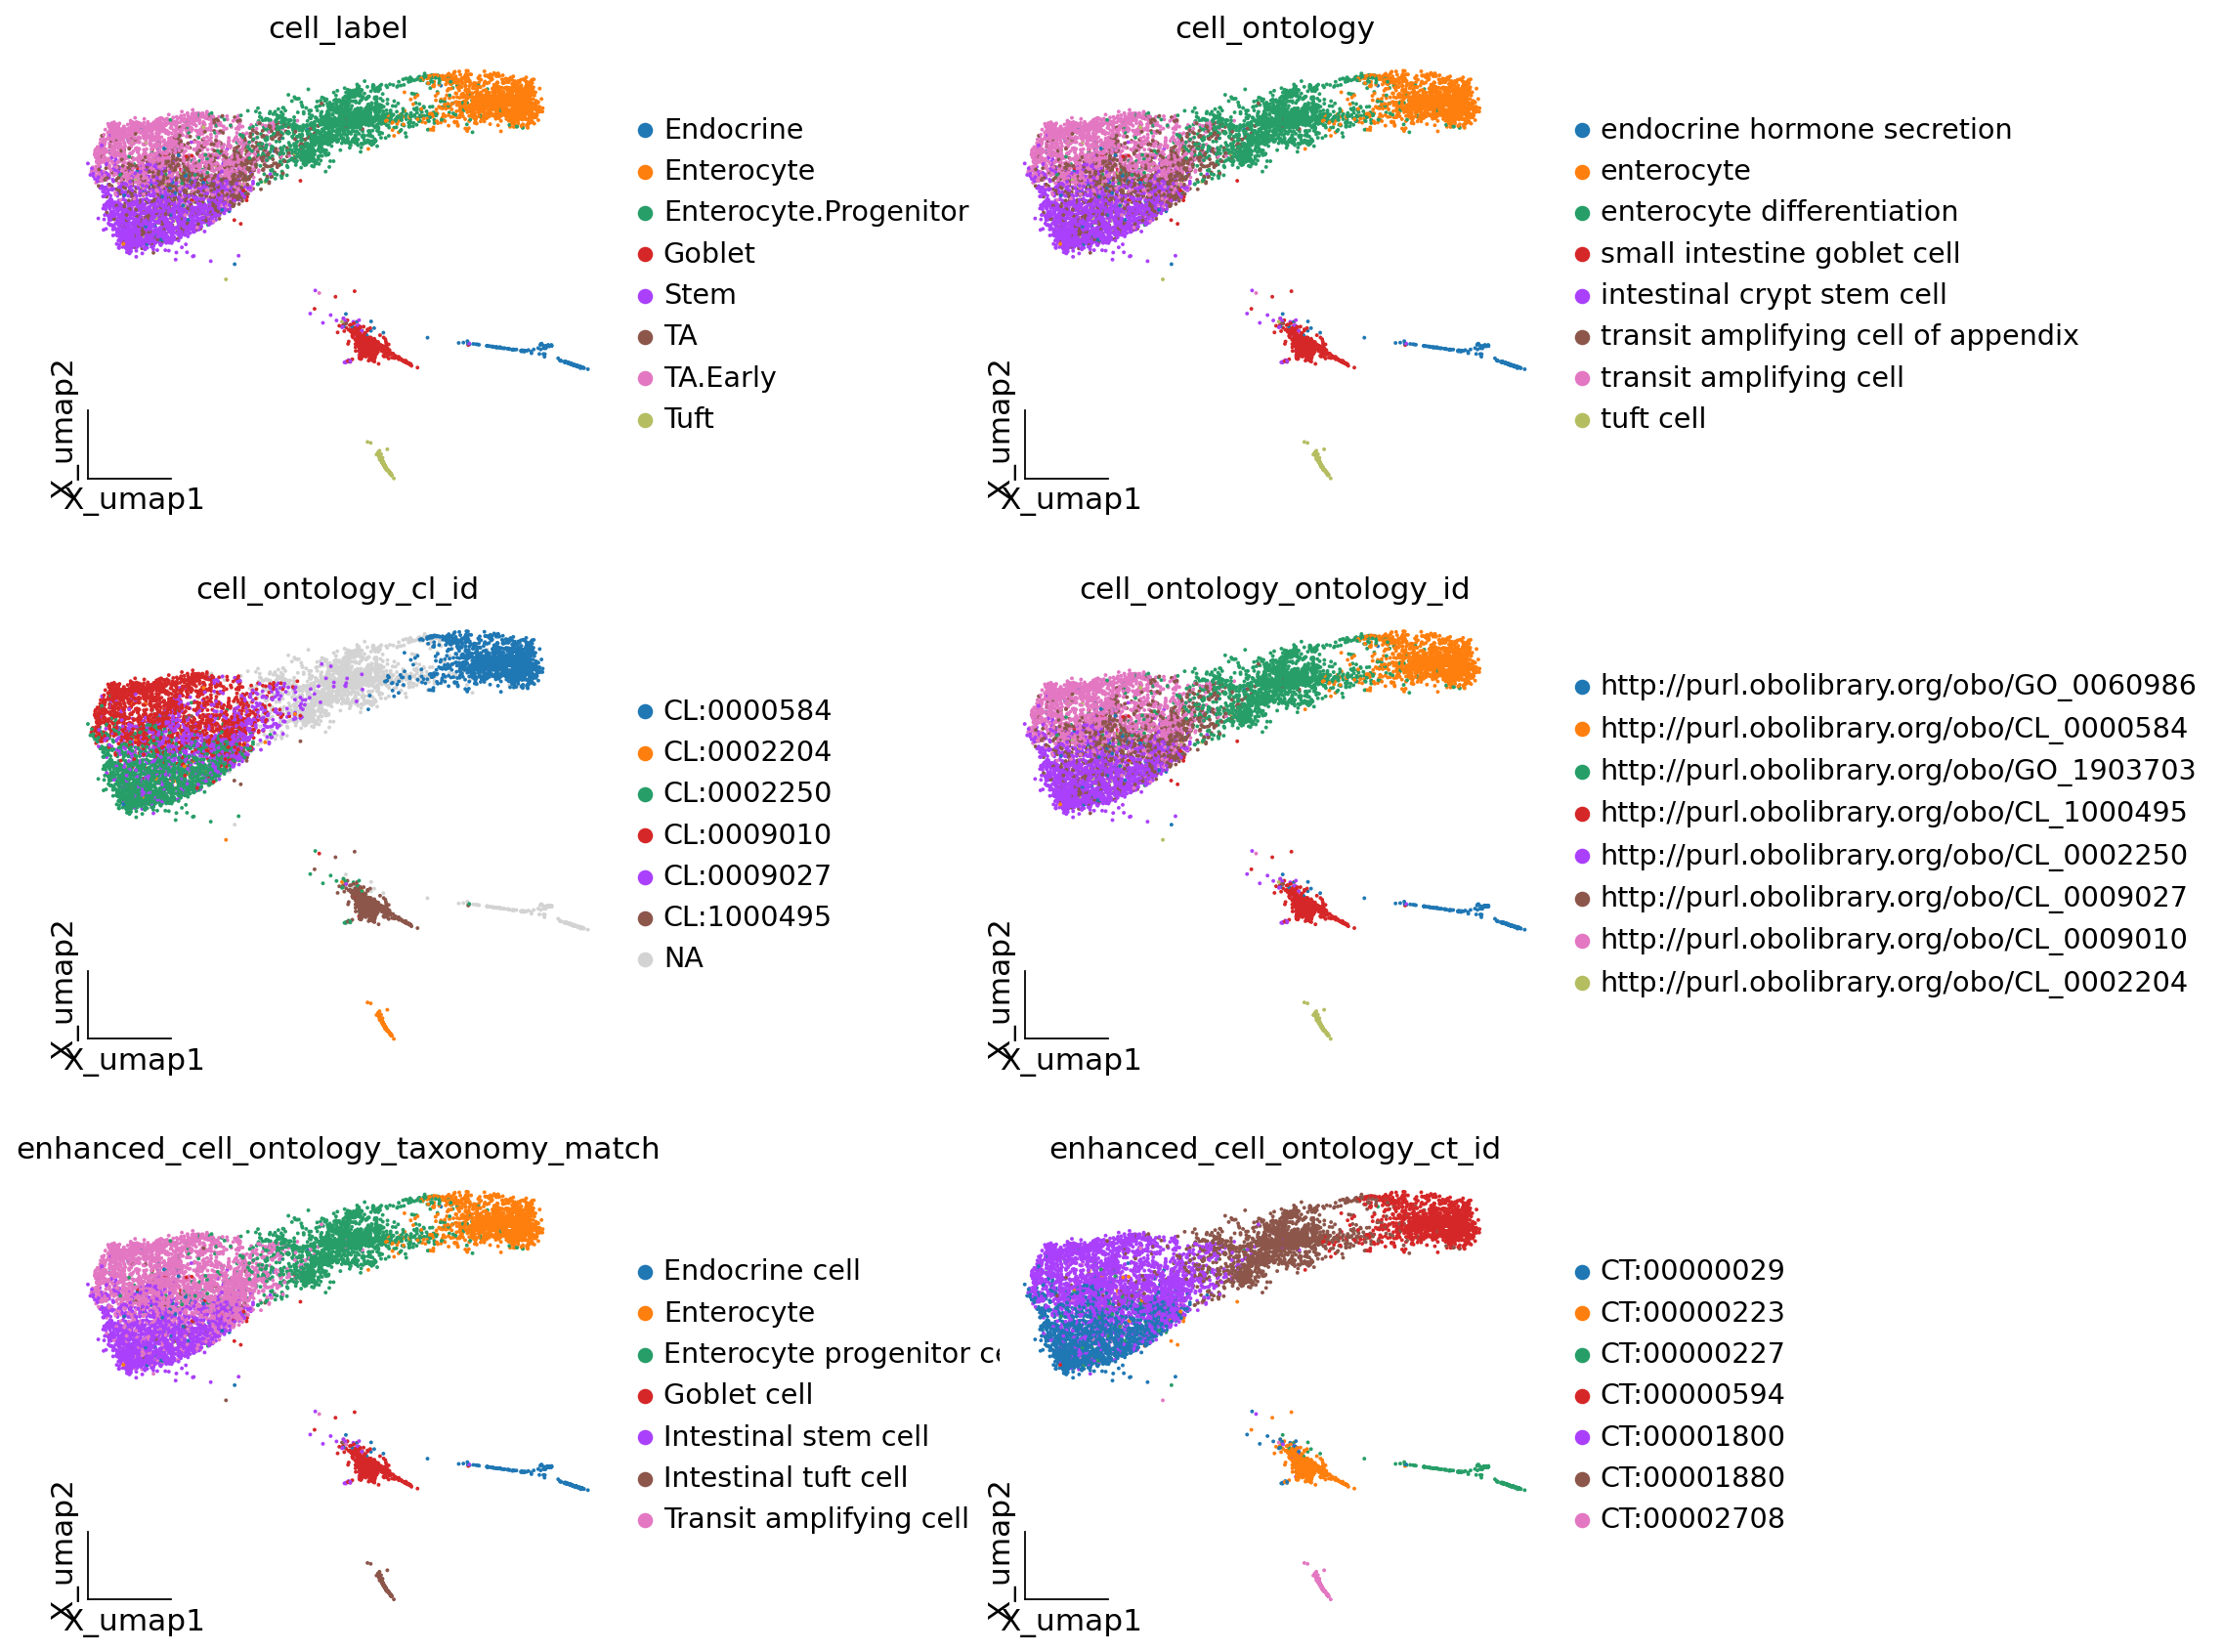

In [59]:
#ov.pl.embedding(
#    adata,
#    basis='X_umap',
#    color=['cell_label','cell_ontology','cell_ontology_cl_id','cell_ontology_ontology_id',
#          'enhanced_cell_ontology_taxonomy_match','enhanced_cell_ontology_ct_id'],
#    wspace=0.55,
#    ncols=2
#)

## Mapping Check

We can also query the matching result manually.

In [19]:
res=mapper.find_similar_cells("T helper cell", top_k=10)
res=mapper.find_similar_cells("Macrophage", top_k=8)



🎯 Ontology cell types most similar to 'T helper cell':
 1. helper T cell                            (Similarity: 0.780)
 2. T-helper 1 cell activation               (Similarity: 0.738)
 3. T-helper 2 cell activation               (Similarity: 0.709)
 4. T-helper 9 cell                          (Similarity: 0.707)
 5. T-helper 2 cell                          (Similarity: 0.690)
 6. T-helper 1 cell                          (Similarity: 0.687)
 7. T cell domain                            (Similarity: 0.678)
 8. regulation of T-helper 1 cell activation (Similarity: 0.675)
 9. CD4-positive helper T cell               (Similarity: 0.664)
10. T-helper 1 cell cytokine production      (Similarity: 0.660)

🎯 Ontology cell types most similar to 'Macrophage':
 1. cycling macrophage                       (Similarity: 0.786)
 2. tissue-resident macrophage               (Similarity: 0.735)
 3. macrophage differentiation               (Similarity: 0.729)
 4. macrophage                               (

In [55]:
#Enterocyte.Progenitor
res=mapper.find_similar_cells_taxonomy("T helper cell", top_k=2)



🧬 Taxonomy cell types most similar to 'T helper cell':
 1. Helper T cell                            (Similarity: 0.966)
     🐭 Species: Mus musculus
     🎯 Marker: Tigit
     🆔 CT ID: CT:00000919

 2. T-helper 1 cell                          (Similarity: 0.926)
     🐭 Species: Homo sapiens
     🎯 Marker: CXCR6
     🆔 CT ID: CT:00000502



In [20]:
mapper.get_cell_info("regulatory T cell")


ℹ️  === regulatory T cell ===
🆔 Ontology ID: http://purl.obolibrary.org/obo/CL_0000815
📝 Description: regulatory T cell: A T cell which regulates overall immune responses as well as the responses of other T cell subsets through direct cell-cell contact and cytokine release. This cell type may express FoxP3 and CD25 and secretes IL-10 and TGF-beta.


{'name': 'regulatory T cell',
 'description': 'regulatory T cell: A T cell which regulates overall immune responses as well as the responses of other T cell subsets through direct cell-cell contact and cytokine release. This cell type may express FoxP3 and CD25 and secretes IL-10 and TGF-beta.',
 'ontology_id': 'http://purl.obolibrary.org/obo/CL_0000815'}

In [ ]:
# 获取详细的taxonomy信息
info_list = mapper.get_cell_info_taxonomy(
    "Helper T cell", 
    species="Mus musculus"
)

In [21]:
mapper.get_cell_info("regulatory T cells")

✗ Cell type not found: regulatory T cells
🔍 Found 0 cell types containing 'regulatory t cells':


In [24]:
my_categories = ["immune cell", "epithelial"]
mapper.browse_ontology_by_category(categories=my_categories, max_per_category=5)

📂 === Browse Ontology Cell Types by Category ===

🔍 Found 0 cell types containing 'immune cell':
--------------------------------------------------
🔍 Found 395 cell types containing 'epithelial':
  1. NS forest marker set of airway submucosal gland collecting duct epithelial cell (Human Lung).
  2. epithelial fate stem cell
  3. epithelial cell
  4. ciliated epithelial cell
  5. duct epithelial cell
... 390 more results

🏷️  【epithelial related】 (Showing top 5):
  1. NS forest marker set of airway submucosal gland collecting duct epithelial cell (Human Lung).
  2. epithelial fate stem cell
  3. epithelial cell
  4. ciliated epithelial cell
  5. duct epithelial cell
--------------------------------------------------


In [29]:
# 查看前50个细胞类型
res=mapper.list_ontology_cells(max_display=10)


📊 Total 16841 cell types in ontology

📋 First 10 cell types:
  1. TAC1
  2. STAB1
  3. TLL1
  4. MSR1
  5. TNC
  6. ROS1
  7. TNIP3
  8. HOMER3
  9. FCGR2B
 10. BPIFB2
... 16831 more cell types
💡 Use return_all=True to get complete list


In [25]:
# 了解本体论的整体情况
stats = mapper.get_ontology_statistics()

📊 === Ontology Statistics ===
📝 Total cell types: 16841
📏 Average name length: 31.7 characters
📏 Shortest name length: 3 characters
📏 Longest name length: 144 characters

🔤 Most common words:
  of: 5473 times
  cell: 3857 times
  regulation: 3168 times
  negative: 1009 times
  positive: 1003 times
  process: 980 times
  development: 875 times
  differentiation: 727 times
  muscle: 639 times
  in: 571 times
